In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras import layers
from keras.backend import clear_session
from keras.preprocessing.text import Tokenizer
from keras.layers import Activation, Dense, Reshape 
import numpy as np
from keras import backend as K
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout, Conv1D, GlobalMaxPooling1D
from keras.models import load_model
from numpy import asarray
from numpy import save
from numpy import load
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import esprima as esp
import re
from keras.initializers import Constant
from tensorflow.keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
from tensorflow.keras.utils import plot_model
from keras import Model
from tensorflow.keras.utils import Sequence
import pydot
import gensim 
from nltk.tokenize import word_tokenize
import pickle
from keras import backend as K
import os
import random
import re
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import logging
from time import time
from functools import partial
# from concurrent.futures import ProcessPoolExecutor
import concurrent.futures
from threading import current_thread
# from tqdm.notebook import tqdm
from tqdm import tqdm
import gc
# Set the random seed for reproducible results
np.random.seed(123)
plt.style.use('ggplot')

In [2]:
csv_path = ["D:\\DataSet\\representatiion_scoring_data_set\\Presenter No11-Rafeef\\C_Presenter No11-GroupA Producted.csv",
            "D:\\DataSet\\representatiion_scoring_data_set\\Presenter No11-Rafeef\\C_Presenter No11-GroupD Producted.csv"]
csv_path =["D:\\DataSet\\representatiion_scoring_data_set\\BODY MOV\\02. Afghanistan And Iraq_ Were they _Just Wars__ _ Eloise Burkey _ TEDxFrancisHollandSchoolSloaneSquare(360P) Producted.csv",
           "D:\\DataSet\\representatiion_scoring_data_set\\BODY MOV\\03. Bite-Sized Mindfulness- An Easy Way for Kids to be Happy and Healthy - KIRA WILLEY - TEDxLehighRiver Producted.csv"]

In [3]:
dfA = pd.read_csv(csv_path[0])
dfD = pd.read_csv(csv_path[1])

In [4]:
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + empty_cell, end=" ")
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report
import seaborn as sns 
sns.set(rc={'figure.figsize':(25,15)})

def print_result(y_pred, y_test , title ,color):

    if len(y_test) < len(y_pred):
        y_pred = y_pred[: len(y_test)]
    elif len(y_test) > len(y_pred):
        y_test = y_test[: len(y_pred)]


    accuracy = accuracy_score(y_pred, y_test)
    classification_rep = classification_report(y_test, y_pred)
    con_matrix = confusion_matrix(y_test, y_pred)
    

    if len(con_matrix)==1:
        if len(con_matrix[0])==1:
            con_matrix = list(con_matrix)
            con_matrix[0] = list(con_matrix[0])
            con_matrix[0].append(0)
            con_matrix = np.array([con_matrix[0],[0,0]])
#     print(con_matrix)

    # ploting confustion matrix
    plt.figure(figsize=(25,15))
    plt.subplot(2,1,1)
    # categories = [‘Zero’, ‘One’]
    # make_confusion_matrix(cf_matrix, 
    #                   group_names=labels,
    #                   categories=categories, 
    #                   cmap=’binary’)

    # sns.heatmap(con_matrix, annot=True, annot_kws={"size": 16},fmt='g', cmap='Blues')
    
    # for i in range(2):
    #   a=con_matrix.tolist()
#     print('y_true class: 0   ',y_test.count(0))
#     print('y_true class: 1   ',y_test.count(1))
    group_names =['without B_M']
    
    T1 = y_test.count(0) if y_test.count(0)!=0 else 1
    T2 = y_test.count(1) if y_test.count(1)!=0 else 1
    
    group_counts = con_matrix
    group_percentages = np.round(con_matrix / np.array([[T1 , T1],[T2 , T2]]),3)
    
#     labels = [[v1,v2] for v1, v2 in zip(group_counts,group_percentages)]
#     labels = np.asarray(labels).reshape(2,2)
    
    t = 0.5
    plt.text(x=0.0 , y = 2.6, s =  "confusion_matrix :",fontsize=15)
    plt.text(x=0.0 , y = 3.3-t, s =  "without B_M",fontsize=15)
    plt.text(x=0.0 , y = 3.4-t, s =  "with B_M ",fontsize=15)
    plt.text(x=0.3 , y = 3.2-t, s =  "without B_M",fontsize=15)
    plt.text(x=0.6 , y = 3.2-t, s =  "with B_M",fontsize=15)
    plt.text(x=0.3 , y = 3.3-t, s =  "{}".format(con_matrix[0][0]),fontsize=15)
    plt.text(x=0.6 , y = 3.3-t, s =  "{}".format(con_matrix[0][1]),fontsize=15)
    plt.text(x=0.3 , y = 3.4-t, s =  "{}".format(con_matrix[1][0]),fontsize=15)
    plt.text(x=0.6 , y = 3.4-t, s =  "{}".format(con_matrix[1][1]),fontsize=15)
  
    sns.heatmap(group_percentages,xticklabels= ['without B_M' , 'with B_M'], yticklabels=['without B_M' , 'with B_M']  , annot=True, annot_kws={"size": 16},fmt='g', cmap=color)
#     print_cm(con_matrix,['without H_M' , 'with H_M'])
    plt.title(title ,  fontsize = 18)
    plt.text(x =0,y = 2.3 , s = "accuracy  score on test : {}".format(accuracy),fontsize=15)    
    plt.text(x=0 , y = 3.9, s =  "classification_report :\n {}".format(classification_rep),fontsize=15)
    
    plt.xlabel("Predicted value")
    plt.ylabel("Real value")
    plt.savefig("{} .png".format(title))

#     plt.savefig(title)
    plt.show()

    # print scores
    # print ("accuracy  score on test : {}".format(accuracy))
    # print(classification_rep)

In [6]:
def save_object(obj, filename):
    with open(filename+".pkl", 'wb') as outp:
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)
    outp.close()

In [7]:
def load_object(filename):
    with open(filename+".pkl", 'rb') as outp:
        loaded_object = pickle.load(outp)
    outp.close()
    return loaded_object

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
def prints(df,y_predict):
    y_test = df['eye_contact'].tolist()
    xx = len(y_test)
    xxx = len(y_predict)
    if xxx>=xx:
        y_predict = y_predict[:xx]
    else:
        y_test = y_test[:xxx]
    print()
    confusion = confusion_matrix(y_test, y_predict)
    print_cm(confusion, ['Move_Hand','Rest_Hand'])
    print()
    print(classification_report(y_test, y_predict, target_names=['Move_Hand','Rest_Hand'])) 
    print("=================================================")

In [9]:
a = np.array([[1, 1], [2, 2], [3, 3]])
a
np.array([[1, 1],
       [2, 2],
       [3, 3]])
np.insert(a, 1, 5)

array([1, 5, 1, 2, 2, 3, 3])

In [24]:
y_predict = load_object("C:\\Users\\user\\Python_Anaconda\\Tasks\\01_body movement\\final version\\body_grouping_frames")
len(y_predict)

12

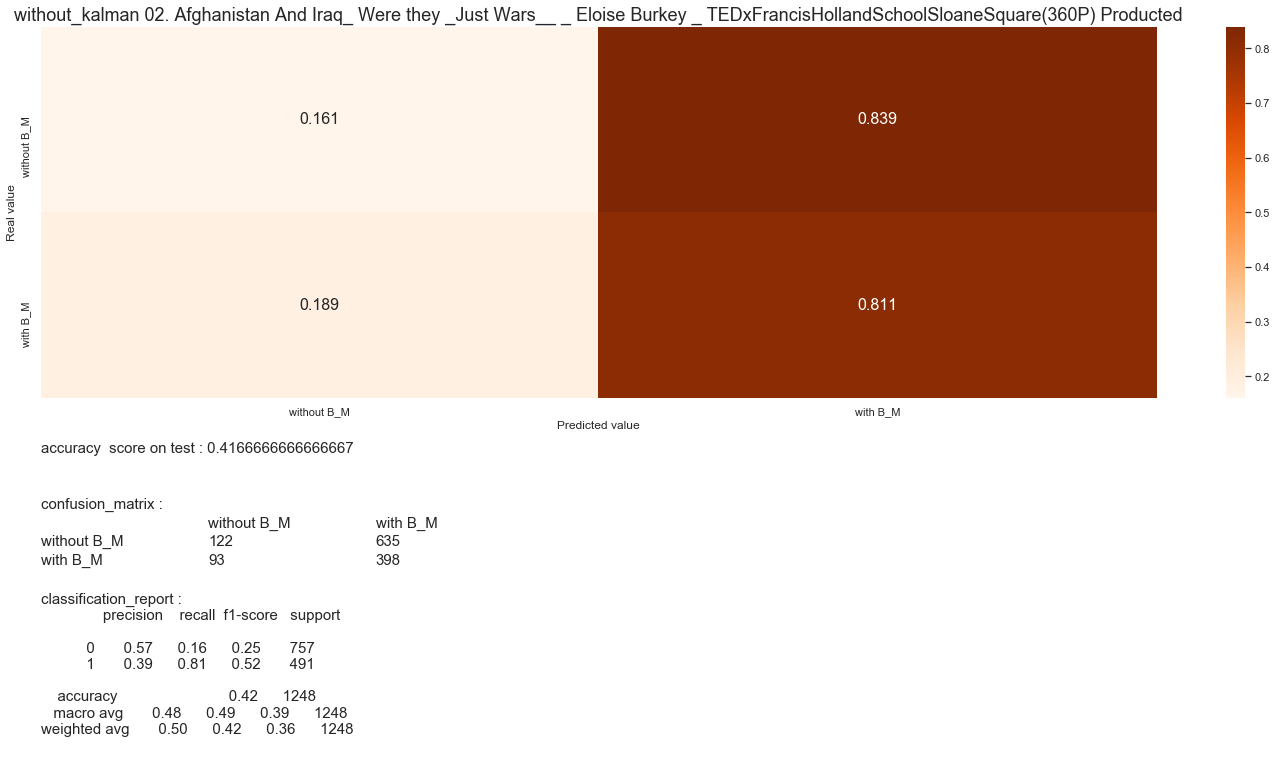

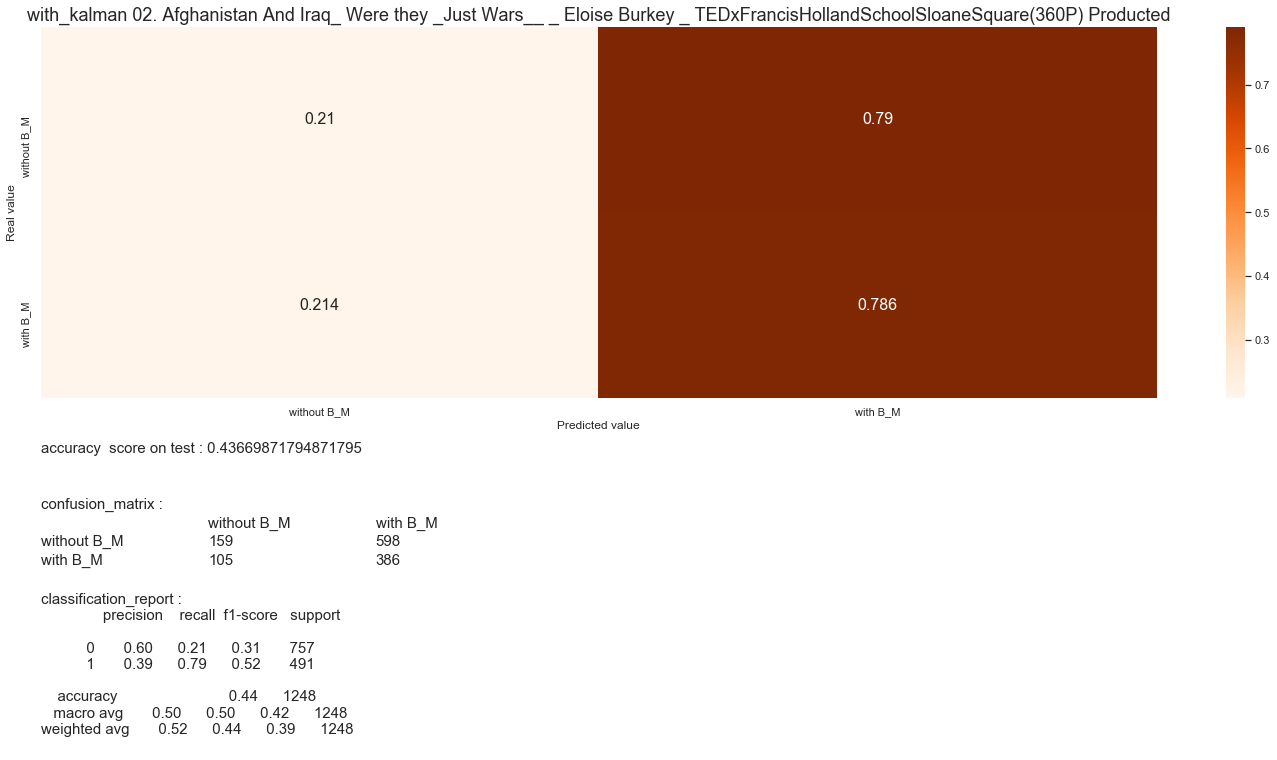

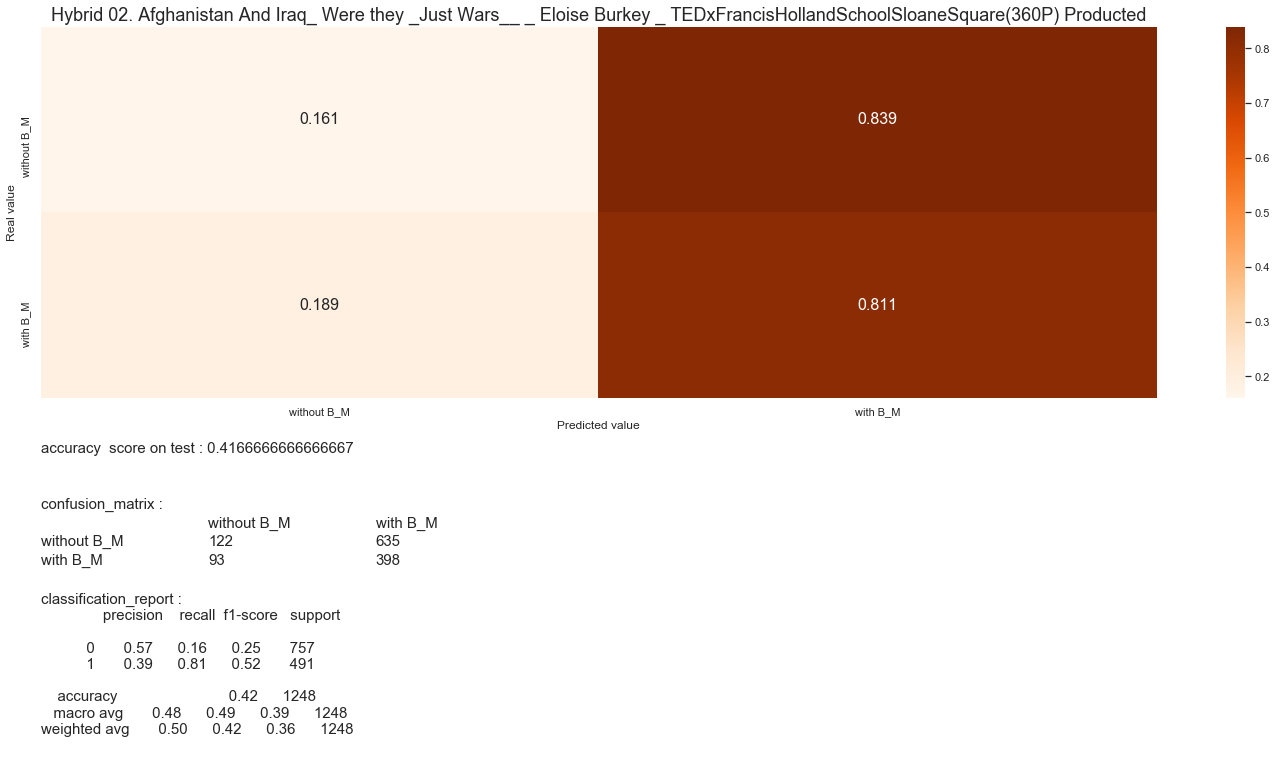

In [25]:
y_test = dfD['eye_contact'].tolist()
title = ['without_kalman','with_kalman','Hybrid']
j=0
for i,y in enumerate(y_predict):
    if i==1 or i==5 or i==9:
        print_result(y, y_test , title[j]+" 02. Afghanistan And Iraq_ Were they _Just Wars__ _ Eloise Burkey _ TEDxFrancisHollandSchoolSloaneSquare(360P) Producted","Oranges")
        j+=1

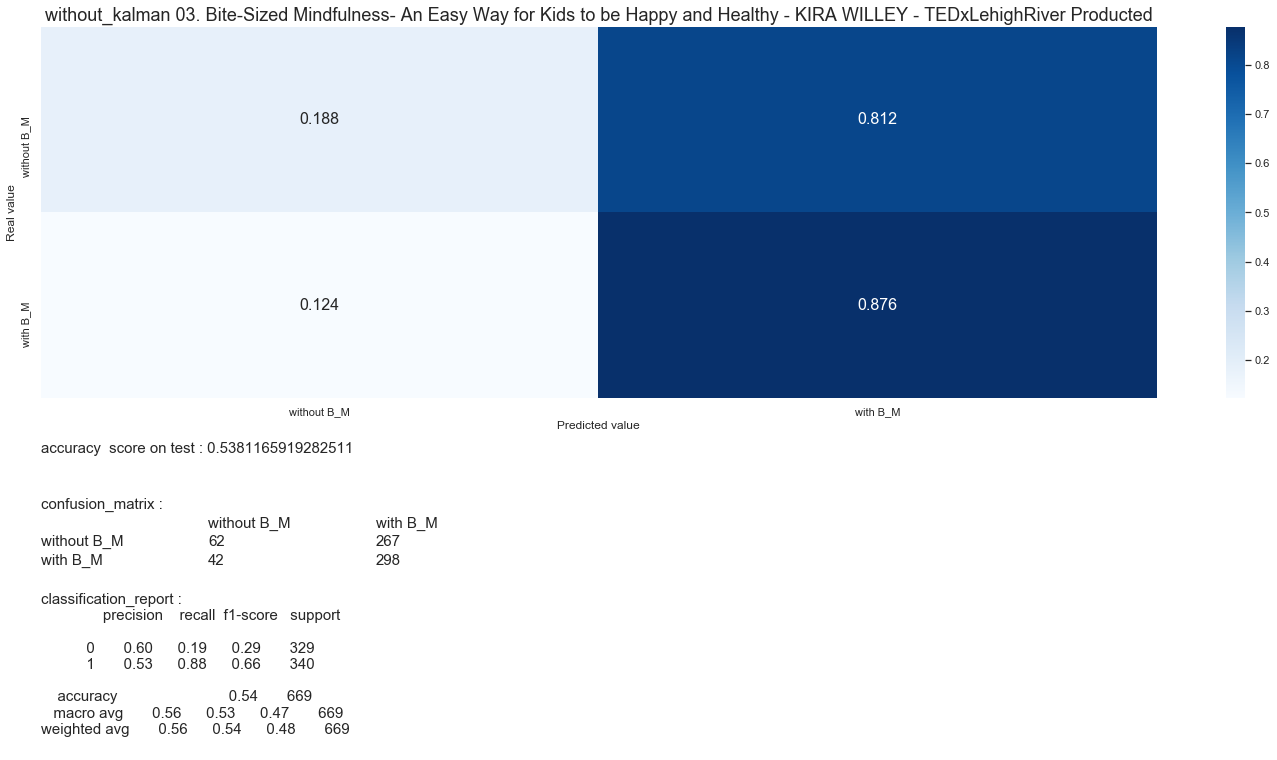

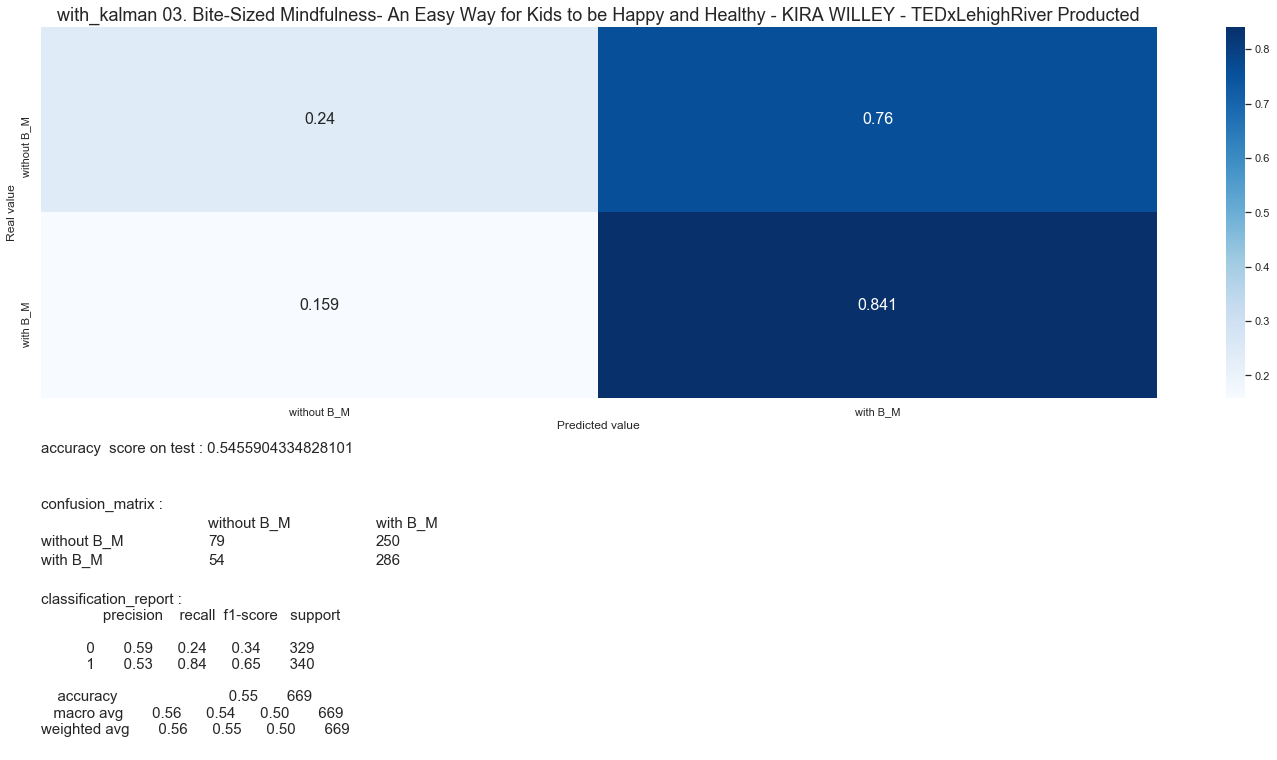

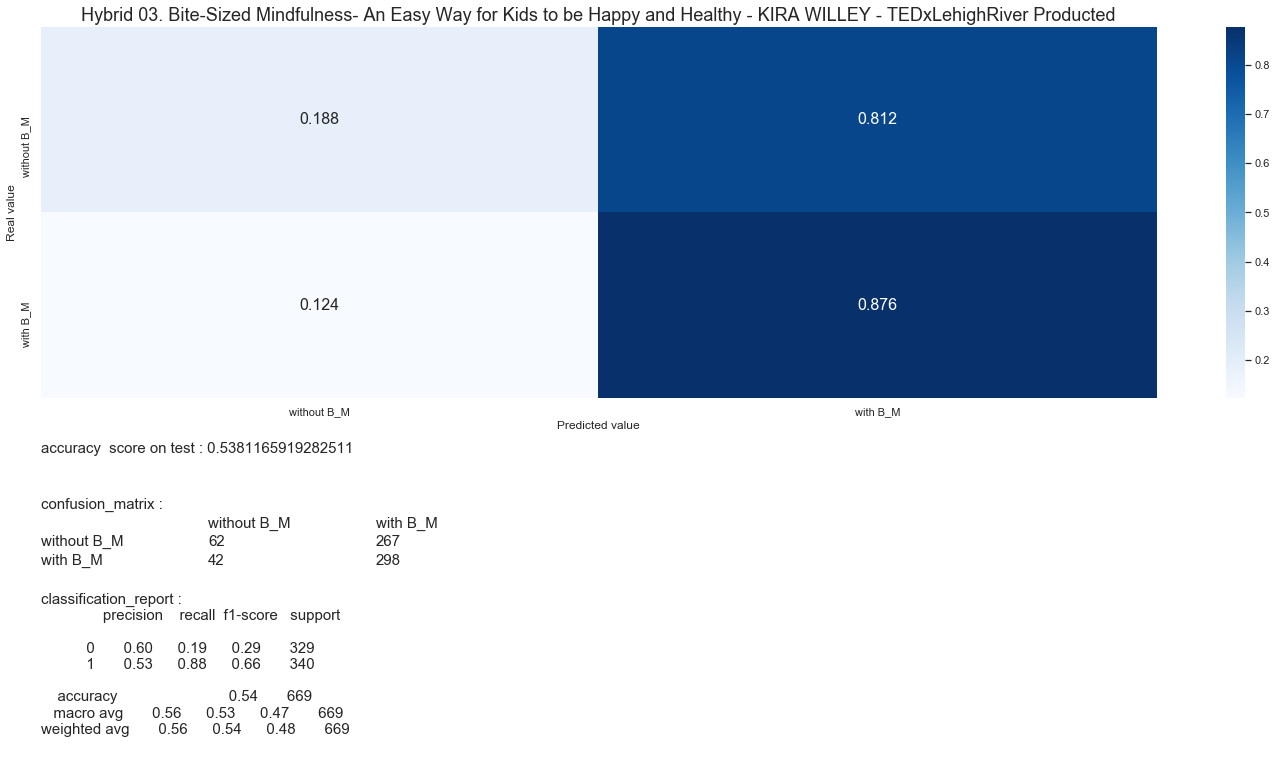

In [26]:
y_test = dfA['eye_contact'].tolist()
j=0
for i,y in enumerate(y_predict):
    if i==2 or i==6 or i==10:
        print_result(y, y_test , title[j]+" 03. Bite-Sized Mindfulness- An Easy Way for Kids to be Happy and Healthy - KIRA WILLEY - TEDxLehighRiver Producted","Blues")
        j+=1

In [27]:
len(dfD['eye_contact'].tolist())

1334

In [19]:
for i in y_predict:
    print(len(i))

1812
1248
1330
1700
1812
1248
1330
1700
1812
1248
1330
1700


In [13]:
df.head()

,set_fram,label,x,y,w,h,eye_contact
0,0,Confusion,0.537731,0.095991,0.068316,0.121437,0
1,1,Confusion,0.538556,0.089882,0.051290,0.091162,0
2,2,Confusion,0.538166,0.097031,0.061262,0.108897,0
3,3,Confusion,0.544733,0.082646,0.060172,0.106963,0
4,4,Confusion,0.539985,0.088099,0.069833,0.124158,1
